This notebook overviews my understanding of Priyesh's diffusion cell data for the composite (un)modified PBI/hydrogel film membranes and presents an estimate of pore densities using a few simple approximations. The math needs double checking, though the final estimates don't seem terribly unreasonable. Assuming all the input data and my understanding thereof are correct and that my assumptions are valid, we can use these estimates to relate numerically-computed effective diffusion constants to the experimental data. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Data from email:
    https://mail.google.com/mail/u/1/#search/priyesh/1600edc1e371599b?projector=1

In [2]:
cuPBId="""Day 1	139.82	675.1327861	15.8	76.29164655
Day 2	128.3	619.5074843	31.58	152.4867214
Day 3	122.52	591.5982617	42.21	203.8145823
Day 4	105.75	510.6228875	49.8	240.4635442
Day 5	103.05	497.5857074	60.83	293.7228392
Day 6	96.2	464.5098986	62.5	301.7865765
Day 7	86.43	417.334621	78.95	381.2168035
Day 8	86.13	415.8860454	79.04	381.6513761"""

cAqpPBId="""Day 1	180.13	869.7730565	2.01	9.705456301
Day 2	168.56	813.9063254	10.45	50.4587156
Day 3	157.35	759.7778851	16.32	78.80251086
Day 4	149.02	719.5557702	21.54	104.0077257
Day 5	145.35	701.8348624	23.65	114.1960406
Day 6	143.11	691.0188315	25.51	123.1772091
Day 7	142.44	687.7836794	26.34	127.1849348
Day 8	142.28	687.0111057	26.25	126.7503621"""

Read data

In [3]:
ppm_to_M = 1/58.4e3     # [1ppm = 1 mg/L = 1 mol /58.4e3 mg / L = [M]]
days_to_sec = 1 * 24 * 60 * 60
def getData(v1):
  ar = []
  for spl in v1.splitlines():
    dar = spl.split()
    dar = dar[1:]
    dar2 = [np.float(s) for s in dar]
    #print dar2
    ar.append(dar2)
  ar = np.asarray(ar)
  #print "printing ar", ar
  ar[:,0]*=days_to_sec
  ar[:,2]*=ppm_to_M  
  ar[:,4]*=ppm_to_M  
  return ar  
    
    

### Compare data for unmodified vs. Aqp membrane

- Not sure if I understand the tables correctly, but I am assuming the first reported concentration corresponds to NaCl in one 'end' of a diffusion cell, while the second corresponds to NaCl in a second 'end' that is separated from the first by a film. 
- if so, the rate of decline in the conc. seems to be similar for the two membranes
- however, the rate of conc. increase in the second end is slower for Aqp relative to the unmodified PBI
- Converted the hundreds of ppm values to molar for convenience

In [4]:

cuPBI = getData(cuPBId)


cAqpPBI = getData(cAqpPBId)

In [5]:
print cuPBI

[[  8.64000000e+04   1.39820000e+02   1.15604929e-02   1.58000000e+01
    1.30636381e-03]
 [  1.72800000e+05   1.28300000e+02   1.06080049e-02   3.15800000e+01
    2.61107400e-03]
 [  2.59200000e+05   1.22520000e+02   1.01301072e-02   4.22100000e+01
    3.48997572e-03]
 [  3.45600000e+05   1.05750000e+02   8.74354259e-03   4.98000000e+01
    4.11752644e-03]
 [  4.32000000e+05   1.03050000e+02   8.52030321e-03   6.08300000e+01
    5.02950067e-03]
 [  5.18400000e+05   9.62000000e+01   7.95393662e-03   6.25000000e+01
    5.16757836e-03]
 [  6.04800000e+05   8.64300000e+01   7.14614077e-03   7.89500000e+01
    6.52768499e-03]
 [  6.91200000e+05   8.61300000e+01   7.12133639e-03   7.90400000e+01
    6.53512630e-03]]


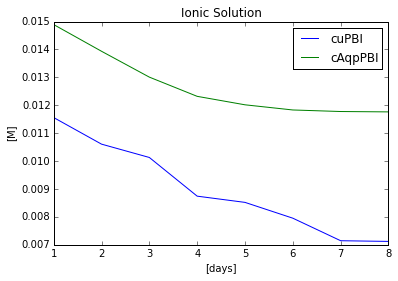

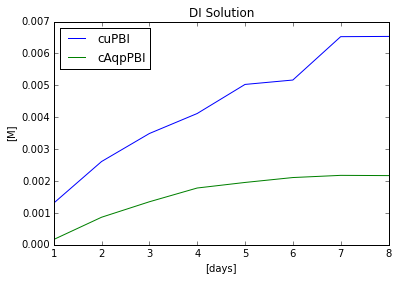

In [6]:

#ppmPerDay_to_uMPerSec /= 1 * 24 * 60 * 60 # 1 day in seconds, --> [M/s]
#ppmPerDay_to_uMPerSec *= 1e6 # [uM/s]

cuPBI = getData(cuPBId)


cAqpPBI = getData(cAqpPBId)

plt.title("Ionic Solution")
plt.ylabel("[M]")
plt.xlabel("[days]")
plt.plot(cuPBI[:,0]/days_to_sec,cuPBI[:,2],label="cuPBI")
plt.plot(cAqpPBI[:,0]/days_to_sec,cAqpPBI[:,2],label="cAqpPBI")
plt.legend()


plt.figure()
plt.title("DI Solution")
plt.ylabel("[M]")
plt.xlabel("[days]")
plt.plot(cuPBI[:,0]/days_to_sec,cuPBI[:,4],label="cuPBI")
plt.plot(cAqpPBI[:,0]/days_to_sec,cAqpPBI[:,4],label="cAqpPBI")
plt.legend(loc=2)

Assuming conc. change within 1 day is linear 
dc/dt = J_in - J_out = J_in (if J_out=0)
Therefore, J_in = Delta C/Delta T

In [7]:
#J_uPBI = 
M_to_uM = 1e6
DeltaT = 1*days_to_sec
J_uPBI = (cuPBI[1,4] - cuPBI[0,4])/DeltaT * M_to_uM   # [uM/s]
J_AqpPBI = (cAqpPBI[1,4] - cAqpPBI[0,4])/DeltaT * M_to_uM   # [uM/s]


In [8]:
J_uPBI, J_AqpPBI

(0.015100812335505453, 0.0080767335939481849)

### Estimating an effective diffusion constant and free volume/area fraction for Aqp-embedded PBI
Here we assume diffusion occurs perpendicular to the plane of a composite film. 

- Based on my pdf derivation for diffusion through a series of layers
$$
J_j = \frac{A \Delta_j c}{L_{PBI}/D_{eff,PBI} + L_{film}/D_{film}}
$$
where $\Delta c$ is the concentration gradient across the PBI/film composite $j$ of area $A$, $L_i$ is the length of phase $i$, and $D_i$ is a diffusion constant within a phase. We use $D_{eff,PBI}$ for the PBI phase, since the diffusion constant will scale with the accessible volume fraction $\phi$ (e.g. $D_{eff} = \phi D$), given cylindrical occlusions (aquaporins) parallel to the applied concentration gradient. 

For clarity, we'll let $\kappa_i = L_i/D_i$, s.t. 
$$
J = \frac{A \Delta c}{\kappa_{PBI}/\phi + \kappa_{film}}
$$

- In this study, we have an unmodified PBI membrane for which we let $\phi_u=1$ (e.g. unobstructed NaCl diffusion) and the modified PBI membrane, for which $\phi_A \le 1$. 

We can estimate $\phi$ for the modified membrane by using the $J_j$ and $\Delta_j c$ values for each configuration $j$ from the exptl measurements and assume that $A$ and $\kappa_i$ are fixed. 
Here,
$$
\begin{align}
\frac{J_A}{J_u} &= \frac{\Delta_A c (\kappa_{PBI} + \kappa_{film})}{\Delta_u c (\kappa_{PBI}/\phi_A + \kappa_{film})}
\end{align}
$$

Letting $\gamma \equiv \frac{J_A \Delta_u c}{J_u \Delta_A c}$, we obtain
$$
\begin{align}
\gamma &=   \frac{(\kappa_{PBI} + \kappa_{film})}{ (\kappa_{PBI}/\phi_A + \kappa_{film})}\\
\Rightarrow \phi_A &= \frac{ \gamma\kappa_{PBI} }{\kappa_{PBI}-(\gamma-1)\kappa_{film} }\\
\phi_A &= \frac{ \gamma}{1-(\gamma-1)\kappa_{film}/\kappa_{PBI} }
\end{align}
$$

Hence, $\phi_A$ can be estimated by evaluating $\gamma$ over a range of $J_j$ values, since we are assuming that $\kappa_{film}/\kappa_{PBI}$ are constant. 



### Application of the model to proof-of-concept estimates

In the system described, we'll assume that the same concentration gradient is applied to both the unmodified and Aqp membranes (e.g. $\Delta_u c = \Delta_A c $) and for the sake of example, 
- $D_{PBI} = 0.5 D_{film}$ 
- $L_{PBI} = 10 $[nm]
s.t.
$ \kappa_{film}/\kappa_{PBI} = L_{film} /(20.)$

We can use this information to probe $\phi$ both as a function of measured $\gamma = J_A/J_u$ and $L_{film}$. Note that we expect $J_A\in [0,J_u]$. 

Another note: I used $D_{eff} = \phi D$, but technically I think any function can be used, so long as $D_{eff} = f(\vec{x}) D$ holds true (that is, $f$ is independent of D). This would then permit corrections to $D_{eff}$ that can be functions of morphology, orientation, system configuration etc. As a simple case, for a composite with spherical, non-conductive inclusions, $D_{eff}/D = f(\phi) = \phi/(2-\phi)$.

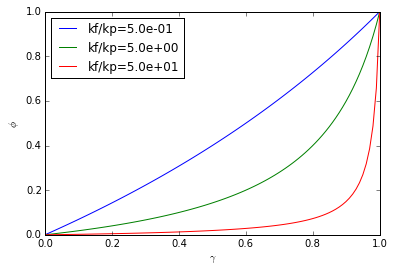

In [9]:
g = np.linspace(0,1,100)  # gamma, assuming D_A c = D_u c
Lfilm = [10,100,1000]  # length of film 

for Lfilmi in Lfilm:
 kf_kp = Lfilmi / 20.   # kfilm/kpbi with assumptions above   
 plt.plot(g,g/(1-(g-1)*kf_kp),label="kf/kp=%3.1e"%kf_kp)

plt.legend(loc=0)    
plt.ylabel("$\phi$")
plt.xlabel("$\gamma$")

The plotted data indicate that the ratio of concentration fluxes can be used to determine the free volume fraction in the Aqp-modified phase, with the obvious conclusions that as 
- $\phi \rightarrow 0$,  $\gamma \rightarrow 0$ which implies $J_A \rightarrow 0$.
- $\phi \rightarrow 1$, $\gamma \rightarrow 1$ which implies $J_A \rightarrow J_u$.

The plots as a function of $L_{film}$ merely indicate that the $\phi$ and $\gamma$ co-dependence will be more apparent as the film layer thickness is reduced.

Once $\phi$ is determined, we can use a simple approximation for the effective diffusion rate in a composite for which the conductivity of the phases is independent of $x$, the direction of diffusion. This would apply, for instance, in the case of cyclinders that are embedded in a composite in an orientation parallel to the concentration gradient, as mentioned before. This configuration permits $\phi$ to be determined by the area fraction of cyclinders in the composite:

$$
\begin{align}
\phi &= \frac{A - n\pi r^2}{A}\\
     &= 1 - \frac{n}{A}\pi r^2 \\
     &= 1 - \rho \pi r^2\\ 
\end{align}
$$

where $\rho$ is the number density of inclusions and $r$ is the impenetrable radius of each pore. 

For more complicated inclusion geometries or for other factors beyond volume fraction that determine the effective diffusion rate (such as ionic strength), numerical methods can be used to estimate $\phi$ (as we have done previously). 




### Application of the model to Priyesh's data

Returning to the diffusion cell data, I think its unusual that the rates of concentration decrease of NaCl are indentical in one end but different in another end. That said, as an exercise we can still obtain $\gamma$ by assuming
- $J_{t_1\rightarrow t_2} = \frac{c(r,t_1) - c(r,t_0)}{t_1-t_0}$ in the 'right' end of the diffusion cell (since the system is closed and thus no material enters/leaves, except through the film boundary
- $\Delta_j c(t_i) = c(l,t_i) - c(r,t_i)$

In [10]:
delT = 86400. # [s]

def calcJ(cs,delT):
  #cs = np.linspace(0,10,11)
  J_u =  cs[1:] - cs[:-1]
  J_u *= M_to_uM
  J_u /= delT
  return J_u

J_u = calcJ(cuPBI[:,4],delT)
J_A = calcJ(cAqpPBI[:,4],delT)

def delc(cs):
    delci = cs[:,2] - cs[:,4]
    delci *= M_to_uM 
    # take as averages    
    avgs = 0.5*(delci[1:] + delci[:-1])
    #print delci
    #print avgs
    return avgs
    
delc_u = delc(cuPBI)
delc_A = delc(cAqpPBI)

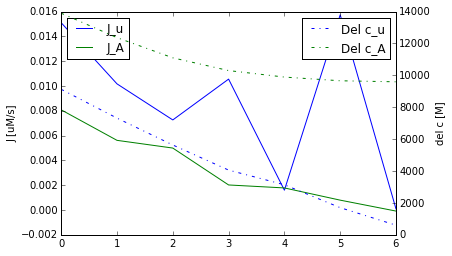

In [11]:
fig,ax = plt.subplots()
ax.plot(J_u,label="J_u")
ax.plot(J_A,label="J_A")
ax.set_ylabel("J [uM/s]")
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(delc_u,'-.',label="Del c_u")
ax2.plot(delc_A,'-.',label="Del c_A")
ax2.set_ylabel("del c [M]")
ax2.legend(loc=1)


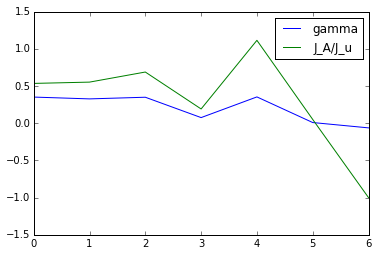

In [12]:
gamma = (J_A / J_u) * (delc_u/delc_A)
plt.plot(gamma, label="gamma")
plt.plot(J_A/J_u, label="J_A/J_u") # assuming dcA=dcu
plt.legend()

By the fourth day of measurements, the gamma/J values get whacky, so I'll just use the gamma values from the first four measurements. $\gamma \approx 0.34$ over this interval. Earlier I made a couple approximations for $k_f/k_p$ that gave the ratio as a function of $L_{film}$. Given the relationship between $\phi$ and $\gamma$ proposed earlier, I'll 
- plot the estimate $phi$ over a range of film lengths. 
- estimate the Aqp density, assuming r=3[nm] for $\phi = 1 - \rho \pi r^2$



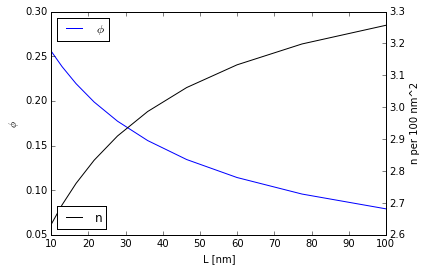

In [13]:
#g/(1-(g-1)*kf_kp


#kf_kp = 
Lfilm = 10**np.linspace(1,2,10) # nm
kf_kp = Lfilm/20. 
g = 0.34
phis = g/(1-(g-1)*kf_kp)

fig,ax = plt.subplots()
ax.plot(Lfilm,phis, label="$\phi$")
ax.set_ylabel("$\phi$")
ax.set_xlabel("L [nm]")
ax.legend(loc=2)

r = 3 # [nm]
rhos = (1-phis)/(np.pi * r**2) # [#/nm^2]
ns = rhos * 100 # number per 100 nm^2

ax2=ax.twinx()
plt.plot(Lfilm,ns,'k',label="n")
ax2.set_ylabel("n per 100 nm^2")
ax2.legend(loc=3)


### Conclusions

Based on these analyses (and many assumptions used in the estimates), the apparent free volume fraction is 0.25 or less. This approaches the limit expected for hexagonally-close packed cylinders, which seems quite a bit a high. With better estimates for the lengths of both the PBI and film layers, as well as the diffusion coefficients therein, more reasonable (larger $\phi$ values and hence smaller Aqp number densities). Alternatively, if there are significant interactions between the diffusing ions and the inclusions, usually the implied free volume fraction will be smaller than the actual volume fraction (e.g. slower diffusion). This frequently arises when weak electrostatic interactions are present or if the ions adsorb onto the protein surface. 